In [1]:
import pandas as pd
import numpy as np

In [132]:
df=pd.read_csv('NIPS_1987-2015.csv',encoding='utf8')

In [133]:
df.head()

Unnamed: 0  1987_1  1987_2  1987_3  1987_4  1987_5  1987_6  1987_7  \
0      abalone       0       0       0       0       0       0       0   
1       abbeel       0       0       0       0       0       0       0   
2       abbott       0       0       0       0       0       0       0   
3   abbreviate       0       0       0       0       0       0       0   
4  abbreviated       0       0       0       0       0       0       0   

   1987_8  1987_9    ...     2015_394  2015_395  2015_396  2015_397  2015_398  \
0       0       0    ...            0         0         0         0         0   
1       0       0    ...            0         0         0         0         0   
2       0       0    ...            0         0         0         0         0   
3       0       0    ...            0         0         0         0         0   
4       0       0    ...            0         0         0         0         0   

   2015_399  2015_400  2015_401  2015_402  2015_403  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 5812 columns]

Extract Terms from 1st column and doc names from headers

In [134]:
terms=df['Unnamed: 0'].tolist()
docs=df.columns.values.tolist()
del docs[0]

Lets form a matrix with just values excluding terms and doc names

Remove Unnamed: 0 column from df

In [135]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

1987_1  1987_2  1987_3  1987_4  1987_5  1987_6  1987_7  1987_8  1987_9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   1987_10    ...     2015_394  2015_395  2015_396  2015_397  2015_398  \
0        0    ...            0         0         0         0         0   
1        0    ...            0         0         0         0         0   
2        0    ...            0         0         0         0         0   
3        0    ...            0         0         0         0         0   
4        0    ...            0         0         0         0         0   

   2015_399  2015_400  2015_401  2015_402  2015_403  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 5811 columns]

In [136]:
df.shape

(11463, 5811)

Now transpose the df so that we have each row containing data related to particular doc and every column indicates a term

In [137]:
df=df.T
df.shape

(5811, 11463)

In [138]:
df.head()

0      1      2      3      4      5      6      7      8      9      \
1987_1      0      0      0      0      0      0      0      0      0      0   
1987_2      0      0      0      0      0      0      0      0      0      1   
1987_3      0      0      0      0      0      0      0      0      0      2   
1987_4      0      0      0      0      0      0      0      0      0      0   
1987_5      0      0      0      0      0      0      0      0      0      1   

        ...    11453  11454  11455  11456  11457  11458  11459  11460  11461  \
1987_1  ...        0      0      0      0      0      0      0      0      0   
1987_2  ...        0      0      0      0      0      0      0      0      0   
1987_3  ...        0      0      0      0      0      0      0      0      0   
1987_4  ...        0      0      0      0      0      0      0      0      0   
1987_5  ...        0      0      0      0      0      0      0      0      0   

        11462  
1987_1      0  
1987_2      0  
1987_3      0  
1987_4      0  
1987_5      0  

[5 rows x 11463 columns]

As per http://www.tfidf.com/, Lets construct Term Frequency Matrix

In [139]:
#doc_term_matrix=df.as_matrix().tolist()
doc_term_matrix=df.as_matrix()

Lets define a Level 2 vector normalizer

In [140]:
def tfCalcForDoc(doc_term):
    docTfMat=[]
    totalWordCnt=np.sum(doc_term)
    for termCnt in doc_term:
        if totalWordCnt != 0:
            docTfMat.append(termCnt/totalWordCnt)
        else:
            docTfMat.append(0)
    return docTfMat

In [141]:
doc_freq_array = []
for doc_term in doc_term_matrix:
    doc_freq_array.append(tfCalcForDoc(doc_term))

In [142]:
doc_freq_matrix=np.asmatrix(doc_freq_array)

Now construct IDF Matrix
To calculate inverse doc freq we again need to transpose the df such that row contains the occurence of each word across corresponding doc in column. Thus we can convert every row to array and calculate the IDF as follows and again contruct the IDF matrix

In [143]:
df=df.T
df.shape

(11463, 5811)

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [144]:
def idfCalcForTerm(term_count_array_across_docs):
    # Total number of documents
    nr = len(term_count_array_across_docs)
    # Number of documents with term t in it
    dr = np.count_nonzero(term_count_array_across_docs)
    
    if dr != 0:
        return np.log10(nr/dr)
    else:
        return 0

Now calculate the idfValue for every term and store it in a list idfArr

In [145]:
arr=np.squeeze(np.asarray(df))
idfArr=[]
for m in arr:
    idfArr.append(idfCalcForTerm(m))

 Tf-idf weight is the product of TF and IDF of particular term and calculated as below

In [146]:
cnt=0
for idfVals in idfArr:
    doc_freq_matrix[:,cnt] *= idfVals
    cnt+= 1

In [147]:
doc_freq_matrix.shape

(5811, 11463)

In [148]:
from scipy import sparse
tfidf_matrix=sparse.csr_matrix(doc_freq_matrix)
#print(tfidf_matrix)

Lets perform K-means clustering for 5 clusters

In [43]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

Wall time: 7min 53s


In [77]:
print('no. of items clustered '+str(len(clusters)))
print('no. of docs '+str(len(docs)))

no. of items clustered 5811
no. of docs 5811


In [93]:
#frame=pd.DataFrame( , columns=['cluster','docName'])
frame=pd.DataFrame(docs , columns=['docName'])

In [94]:
frame.head()

docName
0  1987_1
1  1987_2
2  1987_3
3  1987_4
4  1987_5

In [95]:
frame['clusterid'] = clusters

In [96]:
frame.head()

docName  clusterid
0  1987_1          0
1  1987_2          0
2  1987_3          2
3  1987_4          2
4  1987_5          2

Now calculate the similarity distance by using cosine similarity

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

Perform Multi Dimensional Scaling

Lets compute Top N terms per cluster

Here I am taking N=20 and observe by the terms that every cluster has are logically related to the cluster they are present it. For example if we observe cluster 4 it is evident that most of the terms represent the documents contained in it are related to mathematics which is obvious from the terms like theorem, matrix, latent, regression.

In [121]:
vocab_frame=pd.DataFrame({'words':terms},index=[terms])
N=20
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    
    for ind in order_centroids[i, :N]: #replace 10 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()

Top terms per cluster:

Cluster 0: spike, neurons, neuron, synaptic, chip, circuit, firing, voltage, spikes, synapses, synapse, membrane, spiking, analog, activity, cell, excitatory, postsynaptic, inhibitory, network,

Cluster 1: stimulus, cells, motion, visual, eye, neurons, stimuli, cortex, orientation, receptive, response, cell, motor, activity, head, velocity, cortical, responses, spatial, auditory,

Cluster 2: image, network, images, units, layer, object, hidden, speech, training, networks, recognition, word, features, output, objects, recurrent, segmentation, input, trained, deep,

Cluster 3: sti, sst, stk, str, irt, krr, asr, ary, sit, art, posterior, features, log, number, flickr, floor, flexion, florida, flops, flop,

Cluster 4: policy, kernel, regret, theorem, graph, matrix, bound, clustering, loss, convex, reward, tree, lemma, regression, log, rank, action, latent, bounds, risk,



Visualizing document clusters

In [123]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

cluster_names={  0: 'cluster 0',
                 1: 'cluster 1',
                 2: 'cluster 2', 
                 3: 'cluster 3',
                 4: 'cluster 4'}

In [124]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [125]:
# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

In [127]:
%time pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

Wall time: 22min 57s


In [128]:
%time xs, ys = pos[:, 0], pos[:, 1]

Wall time: 0 ns


In [ ]:
Now Lets Visualize clusters

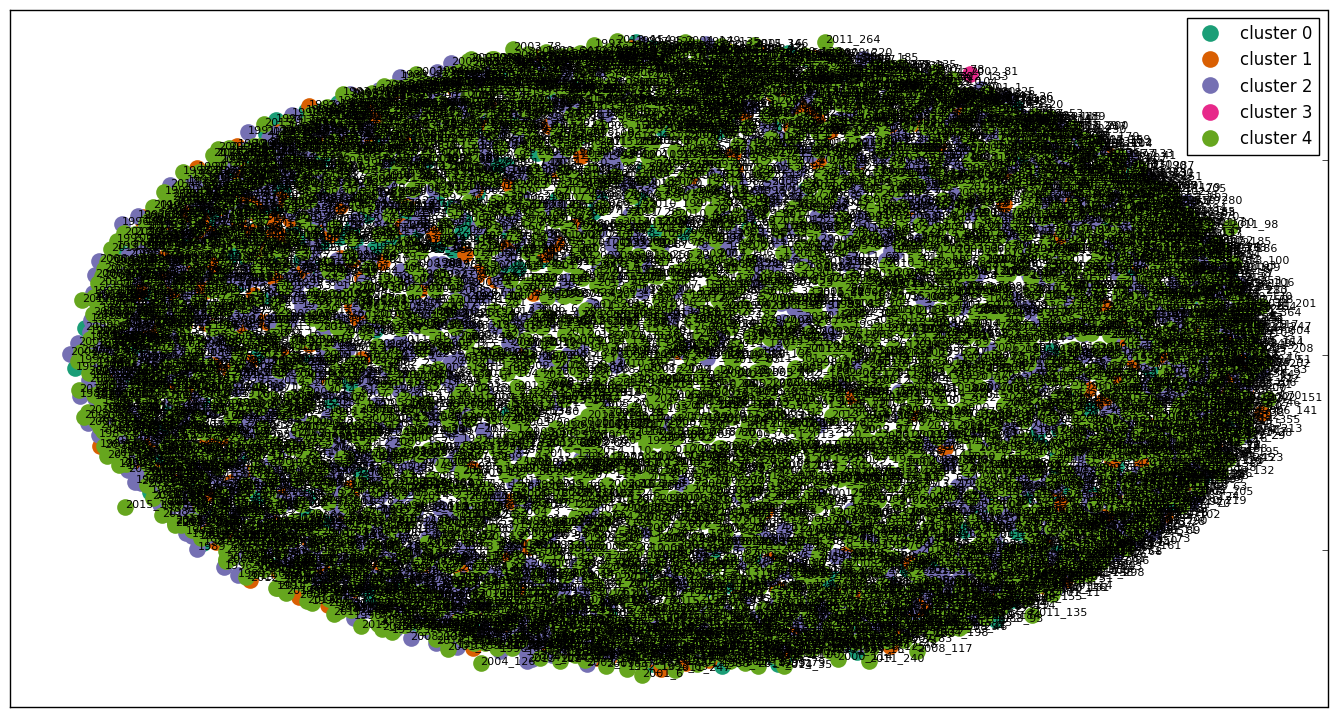

In [149]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and docNames
dfPlot = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=docs)) 

#group by cluster
groups = dfPlot.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(dfPlot)):
    ax.text(dfPlot.ix[i]['x'], dfPlot.ix[i]['y'], dfPlot.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)


In [150]:
plt.savefig('clusters_small_noaxes.png', dpi=200)

In [151]:
plt.close()

In [154]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [157]:
import mpld3
#create data frame that has the result of the MDS plus the cluster numbers and titles
dfd3Plt = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=docs)) 

#group by cluster
groups = dfd3Plt.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(40,16)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot


In [158]:
html = mpld3.fig_to_html(fig)
print(html)



<style>

text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}

text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}

text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}

text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}

text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}

</style>

<div id="fig_el1128443148488969220453079"></div>
<script>
function mpld3_load_lib(url, callback){
  var 

Hierarchical document clustering

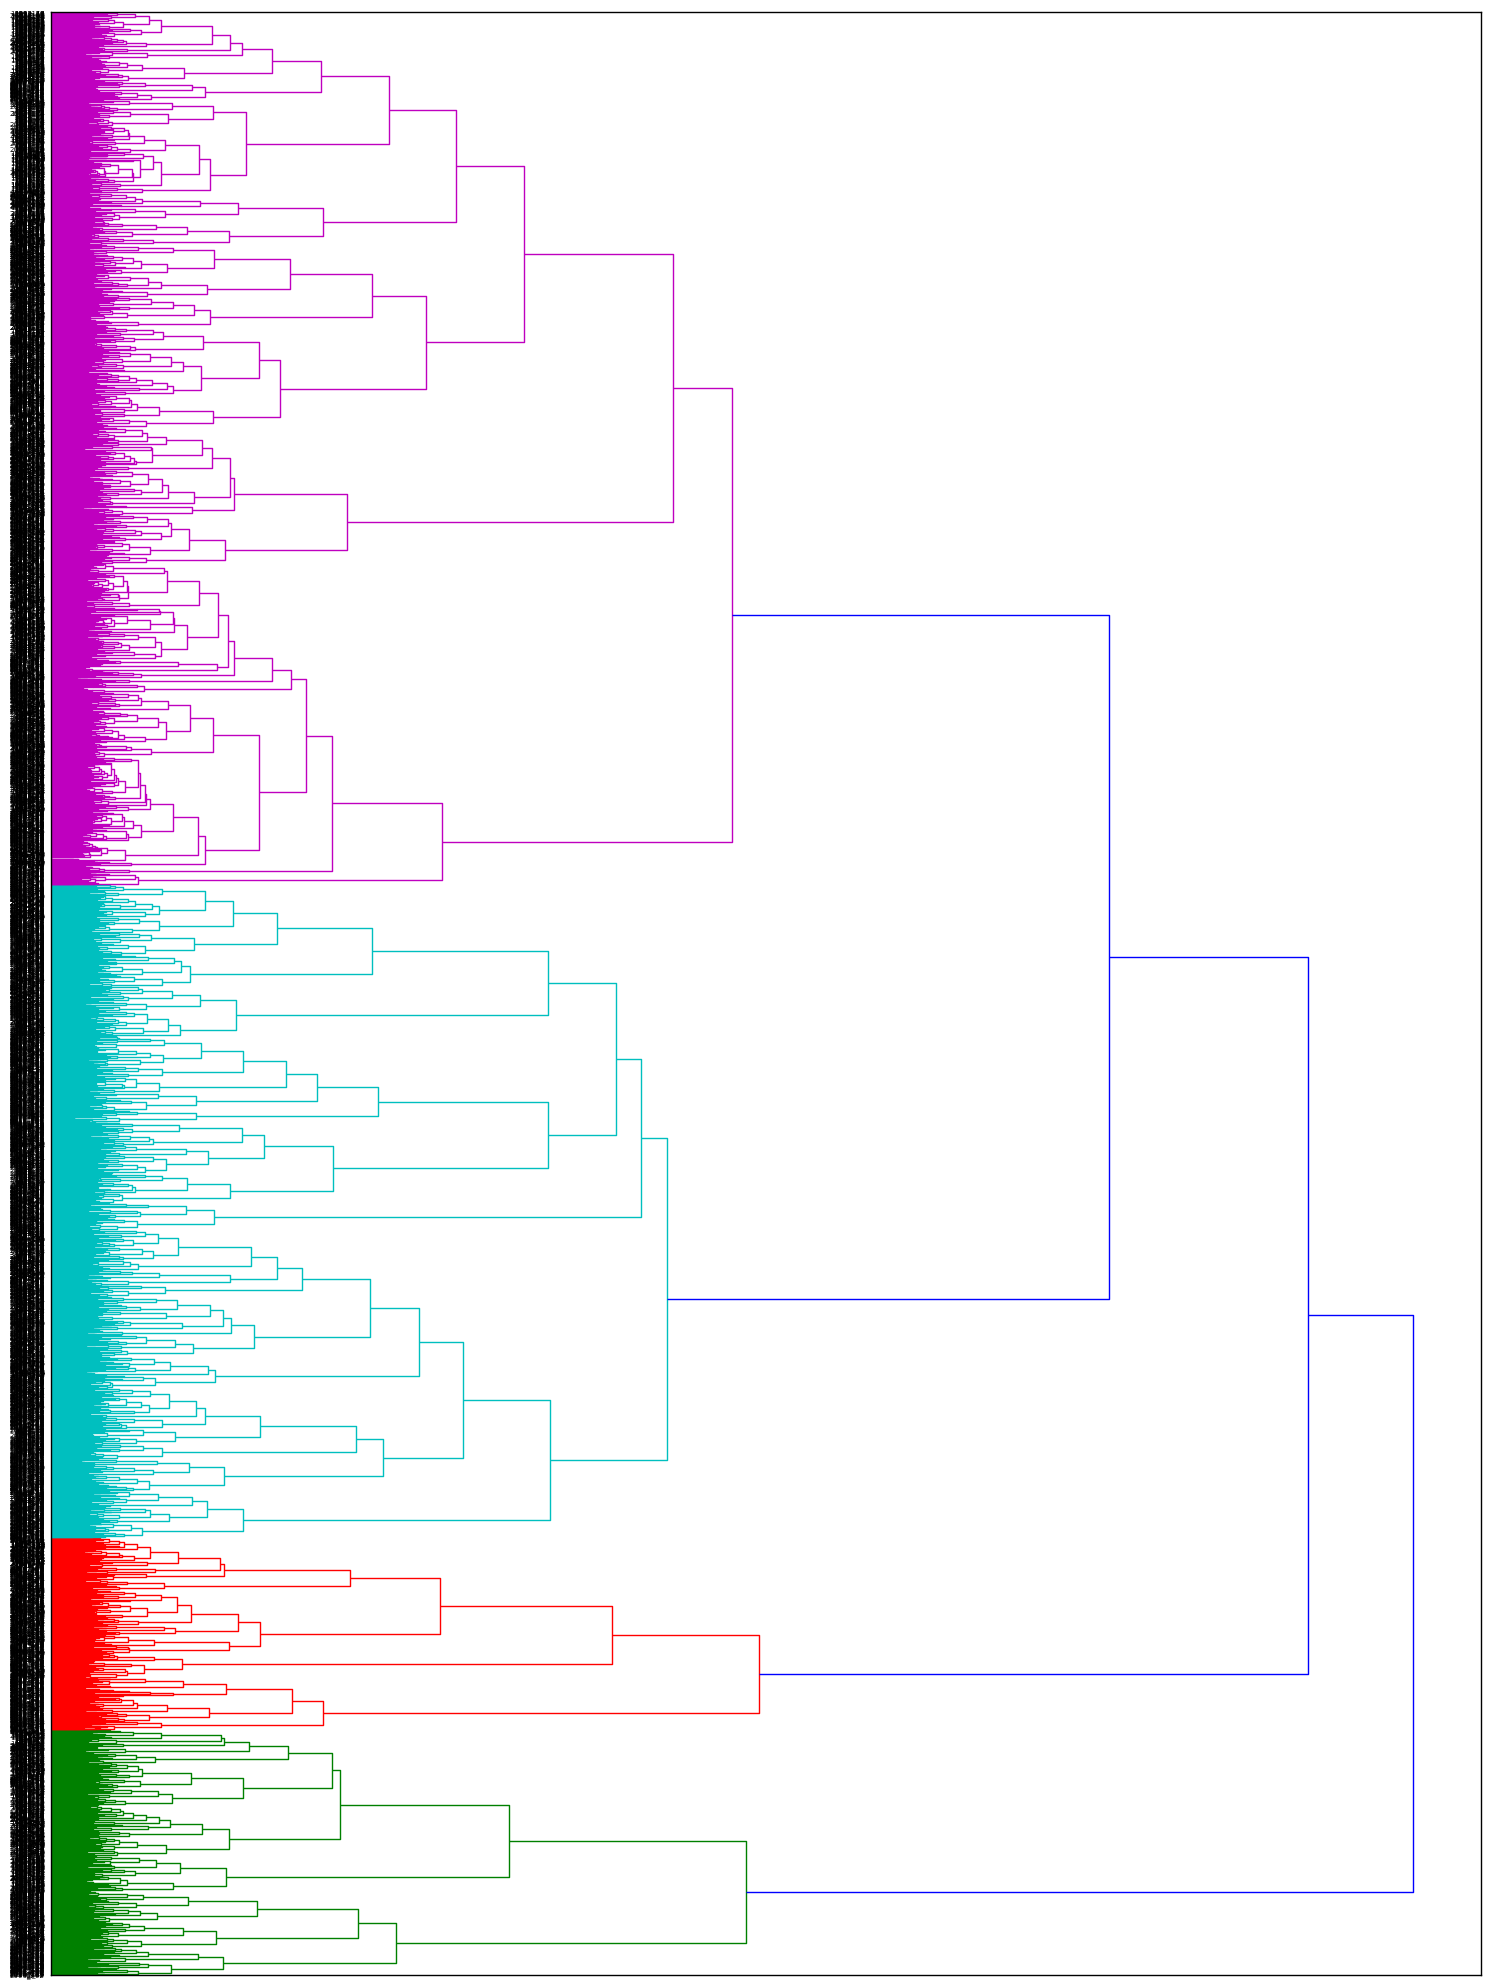

In [159]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=docs);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters